In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# data

In [2]:
def f_true(x):
    y = x**2
    return y

In [227]:
num = 5
alpha = 0
x = np.random.random(num)*20
y = f_true(x)
np.random.seed(0)
y = y + np.random.randn(*x.shape)*alpha

In [228]:
x = np.reshape(x, (x.shape[0],1))
y = np.reshape(y, (y.shape[0],1))

Text(0, 0.5, 'y')

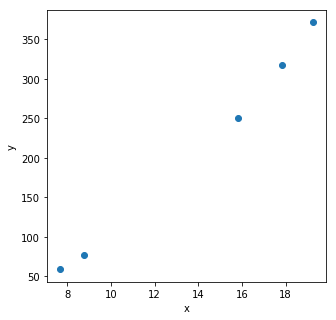

In [229]:
plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")

# Regression

In [230]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [231]:
degree = 15
pf = PolynomialFeatures(degree=degree, include_bias=False)
model = LinearRegression()

In [232]:
x_ = pf.fit_transform(x)

In [233]:
model.fit(x_, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [234]:
y_pred = model.predict(x_)

In [235]:
def f(x):
    coef = model.coef_
    a = np.tile(x, (1, coef.shape[1]))
    for i in range(coef.shape[1]):
        a[:, i] = a[:, i] ** (i+1)
    y = np.dot(a, coef.T)
    return y

In [236]:
data = []
line = np.reshape(np.linspace(0, x.max()+0.5, 100), (100, 1))
y_predict = f(line)
y_true = f_true(line)

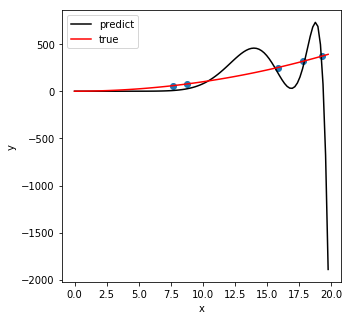

In [237]:
plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.plot(line, y_predict, c="black", label="predict")
plt.plot(line, y_true, c="red", label="true")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

- the number of training data
- the complexity of model (how smart the model is)